In [112]:
%reload_ext autoreload
%autoreload 2

In [114]:
import os, sys
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


import pandas as pd
from src.dbdata_loader import load_data
from src.dbdata_loader import write_to_sql
import src.data_cleaner as cleaner
import src.plotting as plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.decomposition import PCA


In [115]:
# Load data using the function from the module
df = load_data(credentials_file='../env_vars.txt')

# Now, you can use the DataFrame 'df' in your notebook
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
new_df=df.copy()

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
clean_df=cleaner.drop_columns_by_missing_percentage(new_df,30)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.

Dropped 10 columns based on the 30% missing value threshold.
Remaining columns: 45


In [7]:
cleaner.missing_values_table(clean_df)

Your selected dataframe has 45 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27829,18.6,float64
Avg RTT UL (ms),27812,18.5,float64
Last Location Name,1153,0.8,object
MSISDN/Number,1066,0.7,float64
Bearer Id,991,0.7,float64
Nb of sec with Vol UL < 1250B,793,0.5,float64
UL TP > 300 Kbps (%),792,0.5,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.5,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.5,float64
UL TP < 10 Kbps (%),792,0.5,float64


In [8]:
# fix this columns using median 
filled_df = cleaner.fill_missing_values(clean_df, column_names=['Avg RTT DL (ms)', 'Avg RTT UL (ms)'], fill_method='median')


Filled missing values in columns ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'] using 'median' method.


In [9]:
clean_df=filled_df.copy()

In [10]:
cleaner.missing_values_table(clean_df)

Your selected dataframe has 45 columns.
There are 29 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Last Location Name,1153,0.8,object
MSISDN/Number,1066,0.7,float64
Bearer Id,991,0.7,float64
Nb of sec with Vol UL < 1250B,793,0.5,float64
UL TP > 300 Kbps (%),792,0.5,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.5,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.5,float64
UL TP < 10 Kbps (%),792,0.5,float64
Nb of sec with Vol DL < 6250B,755,0.5,float64
DL TP < 50 Kbps (%),754,0.5,float64


In [11]:
new_df=clean_df.copy()
new_df=new_df.drop('Dur. (ms).1',axis=1) # this fearure is a duplicate

In [12]:
# drop missing values
new_df.dropna(inplace=True)

In [13]:
new_df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250

In [15]:
new_df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.468910e+05,146891.000000,146891.000000,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,146891.000000,146891.000000,146891.000000,...,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,1.014458e+19,499.117189,498.654397,1.052299e+05,2.082017e+14,3.596855e+10,4.844173e+13,95.109605,15.386722,13419.455991,...,1.163341e+07,1.100858e+07,1.162650e+07,1.100286e+07,4.220649e+08,8.290257e+06,4.210038e+08,8.262887e+06,4.112139e+07,4.546628e+08
std,2.892813e+18,288.554839,288.073522,8.092446e+04,1.334711e+09,8.792026e+11,2.238835e+13,531.689938,77.037268,24081.550773,...,6.710450e+06,6.345243e+06,6.724904e+06,6.357359e+06,2.440381e+08,4.781553e+06,2.431448e+08,4.768594e+06,1.127775e+07,2.442080e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.852700e+04,2.082014e+14,3.365128e+10,3.546071e+13,34.000000,3.000000,43.000000,...,5.833512e+06,5.516549e+06,5.776626e+06,5.480202e+06,2.103941e+08,4.132622e+06,2.101527e+08,4.144489e+06,3.321835e+07,2.430767e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366369e+10,3.572181e+13,45.000000,5.000000,64.000000,...,1.161638e+07,1.101329e+07,1.164271e+07,1.099939e+07,4.234929e+08,8.294516e+06,4.216332e+08,8.265817e+06,4.114253e+07,4.559702e+08
75%,1.304243e+19,749.000000,750.000000,1.331545e+05,2.082018e+14,3.368344e+10,8.611970e+13,62.000000,11.000000,20023.500000,...,1.744064e+07,1.651411e+07,1.747017e+07,1.650352e+07,6.333301e+08,1.243239e+07,6.313683e+08,1.238204e+07,4.903488e+07,6.657831e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,3.370000e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [16]:
# this function fixes outliers , it uses median instaed of mean not to be affected by the outliers
# uses the get numeric columns function to get the numeric values
numeric_columns = cleaner.get_numeric_columns(new_df)
clean_df = cleaner.fix_outliers(new_df,numeric_columns)
new_df=clean_df.copy()

In [17]:
new_df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.468910e+05,146891.000000,146891.000000,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,146891.000000,146891.000000,146891.000000,...,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,1.014458e+19,499.117189,498.654397,1.052299e+05,2.082017e+14,3.596855e+10,4.844173e+13,54.199250,8.580493,9655.656175,...,1.108134e+07,1.048631e+07,1.107432e+07,1.047974e+07,4.020454e+08,7.897479e+06,4.009499e+08,7.869185e+06,3.998968e+07,4.345709e+08
std,2.892813e+18,288.554839,288.073522,8.092446e+04,1.334711e+09,8.792026e+11,2.238835e+13,32.698576,8.928271,15609.264754,...,6.214843e+06,5.876144e+06,6.230243e+06,5.887647e+06,2.261224e+08,4.429535e+06,2.250934e+08,4.413800e+06,9.987575e+06,2.261651e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.852700e+04,2.082014e+14,3.365128e+10,3.546071e+13,34.000000,3.000000,43.000000,...,5.833512e+06,5.516549e+06,5.776626e+06,5.480202e+06,2.103941e+08,4.132622e+06,2.101527e+08,4.144489e+06,3.321835e+07,2.430767e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366369e+10,3.572181e+13,45.000000,5.000000,64.000000,...,1.161638e+07,1.100858e+07,1.162650e+07,1.099939e+07,4.220649e+08,8.290257e+06,4.210038e+08,8.262887e+06,4.112139e+07,4.546628e+08
75%,1.304243e+19,749.000000,750.000000,1.331545e+05,2.082018e+14,3.368344e+10,8.611970e+13,62.000000,11.000000,13419.455991,...,1.628811e+07,1.541129e+07,1.629033e+07,1.540992e+07,5.907405e+08,1.160522e+07,5.887137e+08,1.154143e+07,4.728362e+07,6.233487e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,3.370000e+14,9.900120e+13,222.000000,45.000000,62798.000000,...,2.207614e+07,2.089846e+07,2.207415e+07,2.091189e+07,8.015368e+08,1.572872e+07,8.007492e+08,1.571673e+07,5.974416e+07,8.343081e+08


In [19]:
lis=list(new_df.columns)
lis

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [25]:
clean_df=cleaner.convert_bytes_to_megabytes(new_df,'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)')
new_df=clean_df.copy()

In [27]:

clean_df=cleaner.convert_ms_to_s(new_df,'Start ms','End ms', 'Dur. (ms)','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Activity Duration DL (ms)', 'Activity Duration UL (ms)')


In [29]:
new_df=clean_df.copy()


In [31]:
new_df.columns

Index(['Bearer Id', 'Start', 'Start s', 'End', 'End s', 'Dur. (s)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (s)',
       'Avg RTT UL (s)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (s)', 'Activity Duration UL (s)',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (MB)',
       'Social Media UL (MB)', 'Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)', 'Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)',
       'Total DL (MB)'],
  

In [54]:
clean_df= cleaner.convert_kbps_to_mbps(new_df, 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)')

In [55]:
new_df=clean_df.copy()

In [61]:
clean_df = cleaner.convert_column_names_kbps_to_mbps(new_df, 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)')


In [69]:
new_df=clean_df.copy()

In [81]:
# change type to datetime64
new_df['Start'] = pd.to_datetime(new_df['Start'], format='%m/%d/%Y %H:%M')
new_df['End'] = pd.to_datetime(new_df['End'], format='%m/%d/%Y %H:%M')


In [89]:
numeric_columns = cleaner.get_numeric_columns(new_df)
clean_df = cleaner.fix_outliers(new_df,numeric_columns)
new_df=clean_df.copy()

In [106]:
table_name = 'cleaned_data'  # Specify your desired table name
write_to_sql(new_df, table_name)

In [125]:
working_df = load_data(database_name='telecom', table_name='cleaned_data')

In [126]:
working_df.head()

,Bearer Id,Start,Start s,End,End s,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (MB),Youtube UL (MB),Netflix DL (MB),Netflix UL (MB),Gaming DL (MB),Gaming UL (MB),Other DL (MB),Other UL (MB),Total UL (MB),Total DL (MB)
0,1.311448e+19,2019-04-04 12:01:00,0.770,2019-04-25 14:35:00,0.662000,1823.652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+19,2019-04-09 13:04:00,0.235,2019-04-25 08:15:00,0.606000,1365.104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,7.869185,53.800391,653.384965
2,1.311448e+19,2019-04-09 17:42:00,0.001,2019-04-25 11:58:00,0.652000,1361.762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+19,2019-04-10 00:31:00,0.486,2019-04-25 07:36:00,0.171000,1321.509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,11.081341,15.146643,13.994646,1.097942,402.045398,10.849722,749.039933,12.797283,43.324218,454.662771
4,1.311448e+19,2019-04-12 20:10:00,0.565,2019-04-25 10:40:00,0.498654,1089.009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


In [127]:
# the top 10 handsets used by the customers

top_handsets = working_df['Handset Type'].value_counts().head(10)
print(f'the top 10 handset used by customers \n {top_handsets}')

the top 10 handset used by customers 
 Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64


In [128]:
#the top 3 handset manufacturers

top_manufacturers = working_df['Handset Manufacturer'].value_counts().head(3)
print(f'the top 3 handset manufacturers \n {top_manufacturers}')

the top 3 handset manufacturers 
 Handset Manufacturer
Apple      59072
Samsung    39902
Huawei     33755
Name: count, dtype: int64


In [129]:
#the top 5 handsets per top 3 handset manufacturer
for manufacturer in top_manufacturers.index[:3]:
    top_handsets_per_manufacturer = working_df[working_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print(f'the top 5 handsets per top 3 handset manufacturer \n {top_handsets_per_manufacturer}')

the top 5 handsets per top 3 handset manufacturer 
 Handset Type
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: count, dtype: int64


In [21]:
# Aggregate per user information in the column for each application
# List of columns to select
selected_columns = [
    'MSISDN/Number','Dur. (ms)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)',
    'Bearer Id'  # Include 'Bearer Id' for counting sessions
]

# Selecting the specified columns
selected_data = new_df[selected_columns]

# Grouping by 'MSISDN/Number' and counting the number of unique 'Bearer Ids'
grouped_data = selected_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'nunique',  # Count unique 'Bearer Ids' for sessions
    'Dur. (ms)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Rename 'Bearer Id' column to 'Number of xDR sessions'
grouped_data = grouped_data.rename(columns={'Bearer Id': 'Number of xDR sessions'})
grouped_data = grouped_data.rename(columns={'Dur. (ms)': 'Session duration (ms)'})
grouped_data.head()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.000000,14900201.0,6724347.0,10265105.0,16915876.0,4.220649e+08,1367528.0,377096990.0,9473882.0,36053108.0,4.546628e+08
1,3.360100e+10,1,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.000000,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.000000,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.000000,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,613062.975526,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


In [22]:
grouped_data.describe()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.057190e+05,105719.000000,1.057190e+05,1.057190e+05,105719.000000,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05
mean,3.686153e+10,1.379733,1.462114e+05,2.375707e+06,43561.669592,7.614345e+06,2.721448e+06,2.371092e+06,6.183480e+05,1.539694e+07,1.457017e+07,1.538719e+07,1.456105e+07,5.586210e+08,1.097313e+07,5.570989e+08,1.093382e+07,5.556356e+07,6.038134e+08
std,1.036359e+12,0.773251,1.845391e+05,1.766164e+06,32398.118858,5.671985e+06,2.030123e+06,1.773610e+06,4.619209e+05,1.149239e+07,1.084496e+07,1.150178e+07,1.083724e+07,4.148209e+08,8.162929e+06,4.149052e+08,8.141673e+06,3.384524e+07,4.350979e+08
min,3.360100e+10,1.000000,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,3.365088e+10,1.000000,7.272900e+04,1.174224e+06,21546.500000,3.794078e+06,1.339598e+06,1.182622e+06,3.061585e+05,7.636890e+06,7.228819e+06,7.578824e+06,7.202572e+06,2.787971e+08,5.435839e+06,2.762700e+08,5.453886e+06,3.637849e+07,3.142406e+08
50%,3.366364e+10,1.000000,1.031110e+05,2.098097e+06,38602.000000,6.727113e+06,2.404970e+06,2.101869e+06,5.451450e+05,1.356451e+07,1.289591e+07,1.361574e+07,1.289061e+07,4.939824e+08,9.718553e+06,4.917017e+08,9.652353e+06,4.518387e+07,5.323016e+08
75%,3.368340e+10,2.000000,1.727990e+05,3.090601e+06,56723.000000,9.873651e+06,3.539134e+06,3.074418e+06,8.050135e+05,2.002492e+07,1.892705e+07,2.000634e+07,1.892286e+07,7.251434e+08,1.428623e+07,7.230857e+08,1.421237e+07,6.182566e+07,7.658065e+08
max,3.370000e+14,18.000000,1.855375e+07,4.109798e+07,630942.000000,1.104059e+08,3.403147e+07,3.189541e+07,8.578857e+06,2.160503e+08,2.104343e+08,1.994792e+08,2.032419e+08,7.316364e+09,1.418386e+08,7.644065e+09,1.529305e+08,7.045916e+08,7.811295e+09


In [23]:
# basic metrics 
grouped_data.describe()

,MSISDN/Number,Number of xDR sessions,Session duration (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.057190e+05,105719.000000,1.057190e+05,1.057190e+05,105719.000000,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05
mean,3.686153e+10,1.379733,1.462114e+05,2.375707e+06,43561.669592,7.614345e+06,2.721448e+06,2.371092e+06,6.183480e+05,1.539694e+07,1.457017e+07,1.538719e+07,1.456105e+07,5.586210e+08,1.097313e+07,5.570989e+08,1.093382e+07,5.556356e+07,6.038134e+08
std,1.036359e+12,0.773251,1.845391e+05,1.766164e+06,32398.118858,5.671985e+06,2.030123e+06,1.773610e+06,4.619209e+05,1.149239e+07,1.084496e+07,1.150178e+07,1.083724e+07,4.148209e+08,8.162929e+06,4.149052e+08,8.141673e+06,3.384524e+07,4.350979e+08
min,3.360100e+10,1.000000,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,3.365088e+10,1.000000,7.272900e+04,1.174224e+06,21546.500000,3.794078e+06,1.339598e+06,1.182622e+06,3.061585e+05,7.636890e+06,7.228819e+06,7.578824e+06,7.202572e+06,2.787971e+08,5.435839e+06,2.762700e+08,5.453886e+06,3.637849e+07,3.142406e+08
50%,3.366364e+10,1.000000,1.031110e+05,2.098097e+06,38602.000000,6.727113e+06,2.404970e+06,2.101869e+06,5.451450e+05,1.356451e+07,1.289591e+07,1.361574e+07,1.289061e+07,4.939824e+08,9.718553e+06,4.917017e+08,9.652353e+06,4.518387e+07,5.323016e+08
75%,3.368340e+10,2.000000,1.727990e+05,3.090601e+06,56723.000000,9.873651e+06,3.539134e+06,3.074418e+06,8.050135e+05,2.002492e+07,1.892705e+07,2.000634e+07,1.892286e+07,7.251434e+08,1.428623e+07,7.230857e+08,1.421237e+07,6.182566e+07,7.658065e+08
max,3.370000e+14,18.000000,1.855375e+07,4.109798e+07,630942.000000,1.104059e+08,3.403147e+07,3.189541e+07,8.578857e+06,2.160503e+08,2.104343e+08,1.994792e+08,2.032419e+08,7.316364e+09,1.418386e+08,7.644065e+09,1.529305e+08,7.045916e+08,7.811295e+09


In [24]:
# Calculate skewness, kurtosis, and unique counts
grouped_data.skew()


MSISDN/Number              325.144582
Number of xDR sessions       3.271181
Session duration (ms)       20.773634
Social Media DL (Bytes)      2.074081
Social Media UL (Bytes)      2.008864
Google DL (Bytes)            2.071382
Google UL (Bytes)            2.015240
Email DL (Bytes)             2.105466
Email UL (Bytes)             2.047269
Youtube DL (Bytes)           2.054279
Youtube UL (Bytes)           2.081085
Netflix DL (Bytes)           2.034115
Netflix UL (Bytes)           2.019525
Gaming DL (Bytes)            2.013839
Gaming UL (Bytes)            2.009845
Other DL (Bytes)             2.001888
Other UL (Bytes)             2.055918
Total UL (Bytes)             2.901330
Total DL (Bytes)             2.125152
dtype: float64

In [25]:
# Calculate kurtosis
grouped_data.kurt()

MSISDN/Number              105718.999596
Number of xDR sessions         20.712034
Session duration (ms)        1283.091023
Social Media DL (Bytes)        11.496340
Social Media UL (Bytes)         9.559494
Google DL (Bytes)              10.305494
Google UL (Bytes)               9.096401
Email DL (Bytes)               10.430886
Email UL (Bytes)                9.821487
Youtube DL (Bytes)              9.812026
Youtube UL (Bytes)             10.594770
Netflix DL (Bytes)              9.552405
Netflix UL (Bytes)              9.495636
Gaming DL (Bytes)               9.397655
Gaming UL (Bytes)               9.258463
Other DL (Bytes)                9.144105
Other UL (Bytes)               10.053525
Total UL (Bytes)               16.678199
Total DL (Bytes)               10.187083
dtype: float64

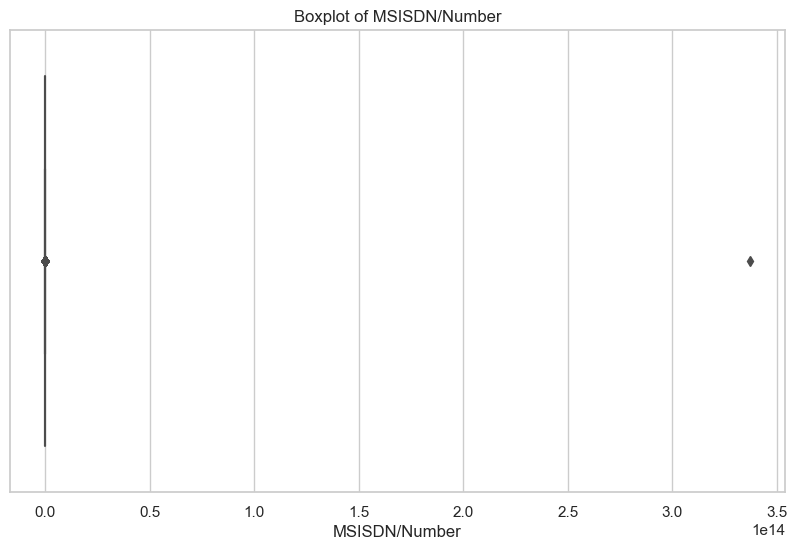

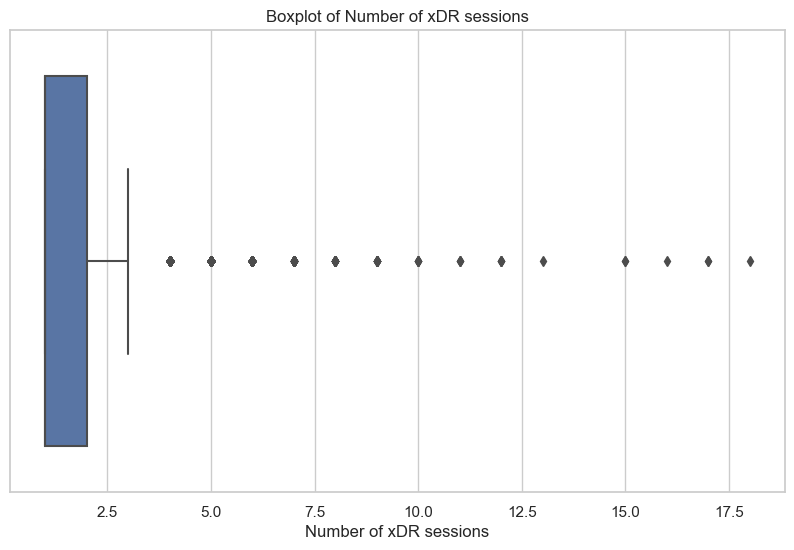

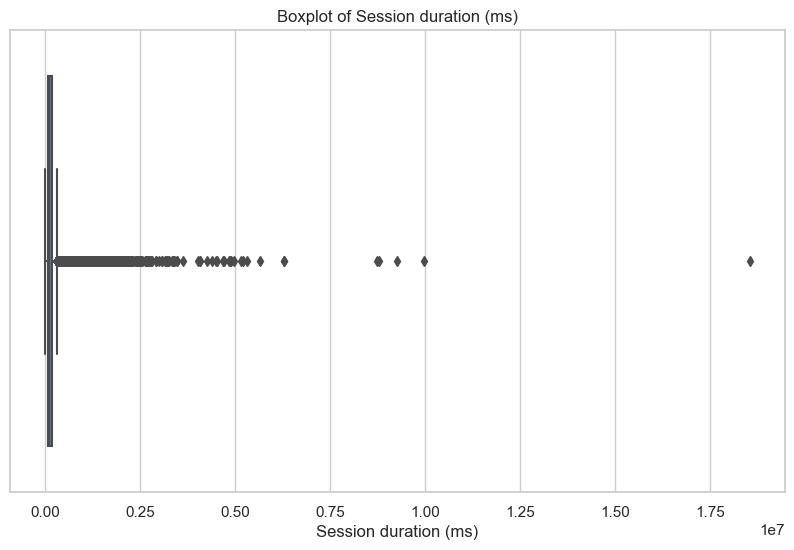

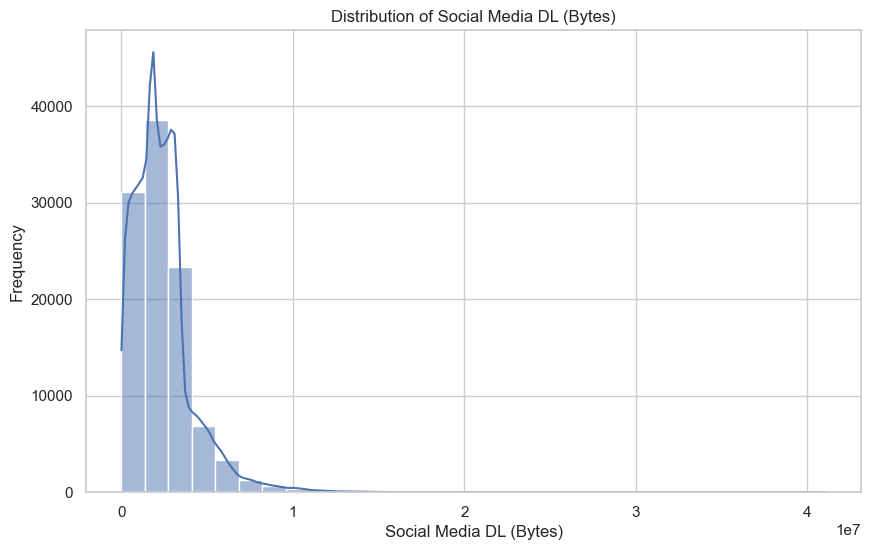

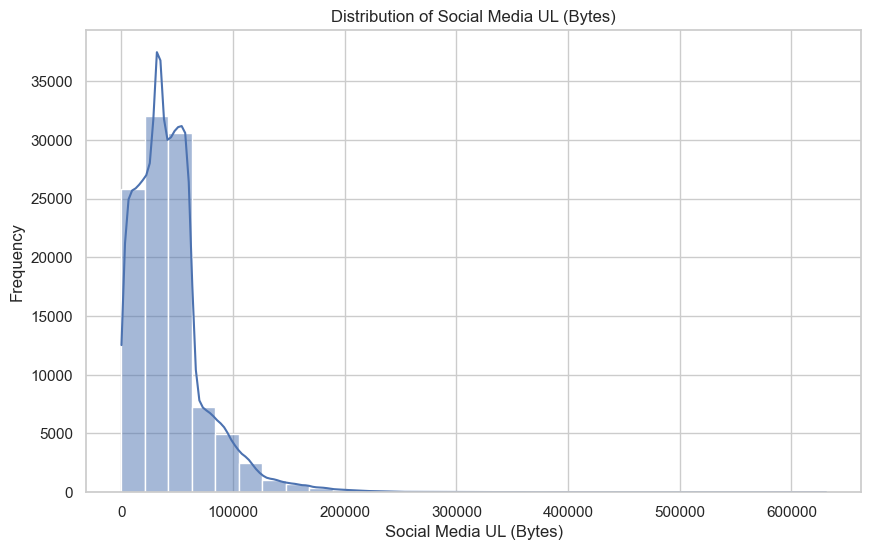

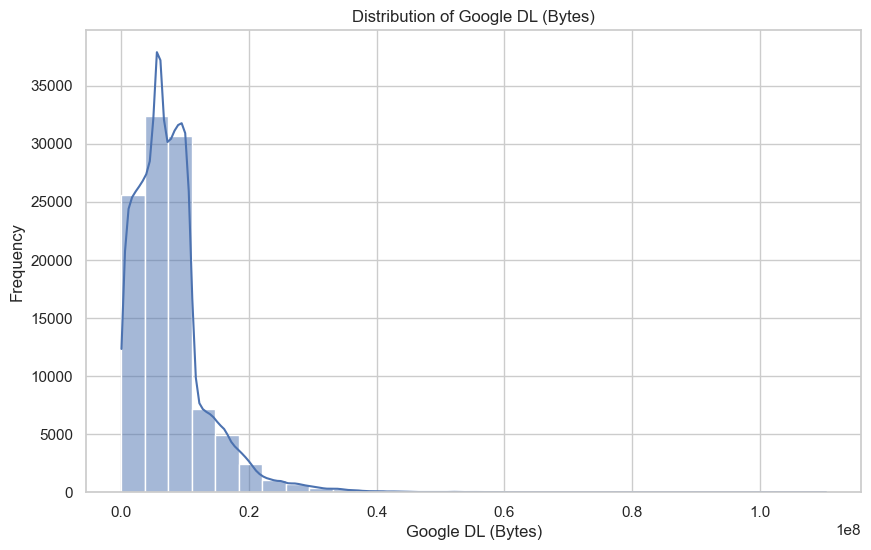

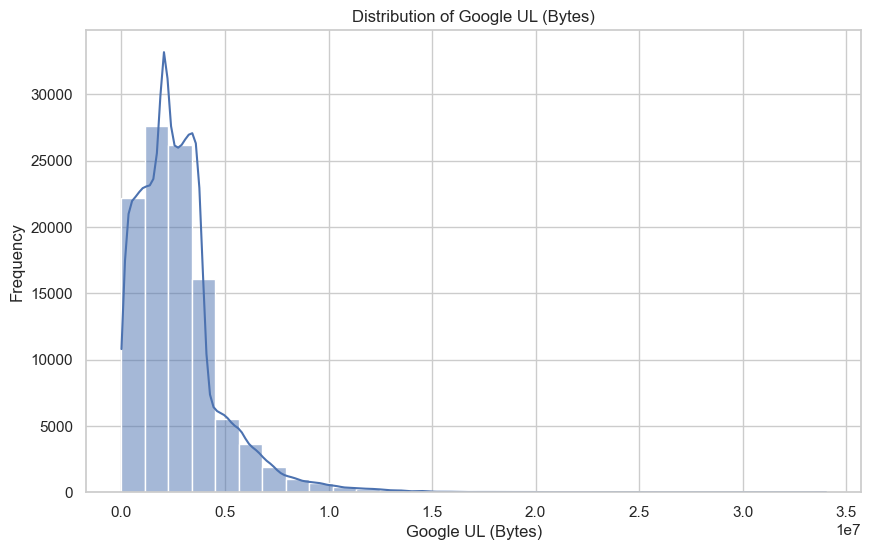

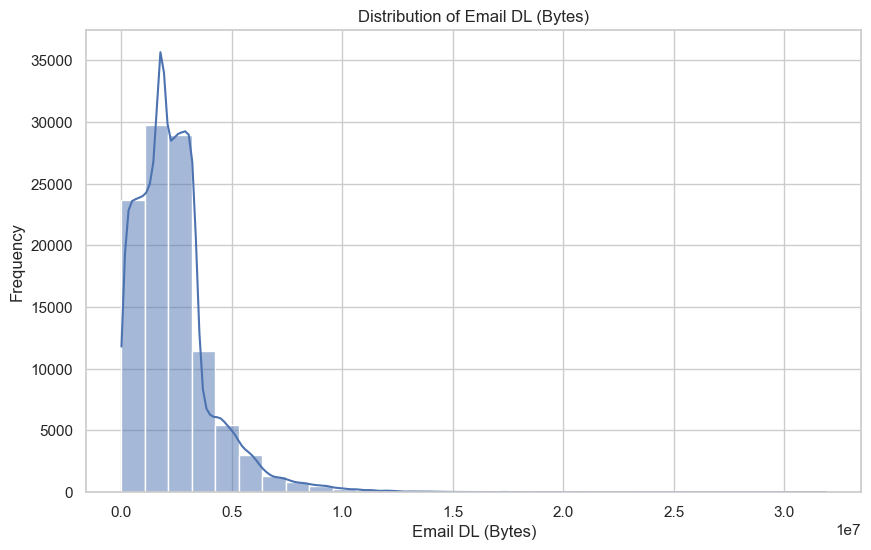

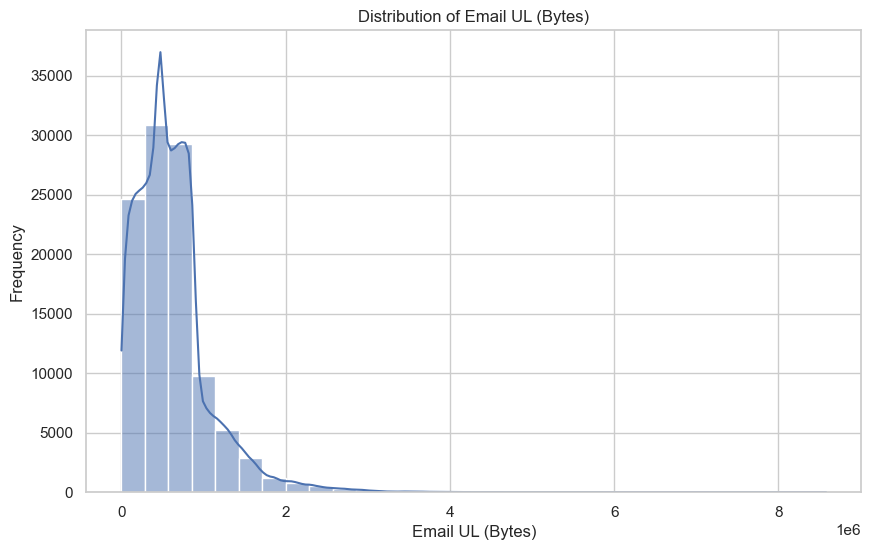

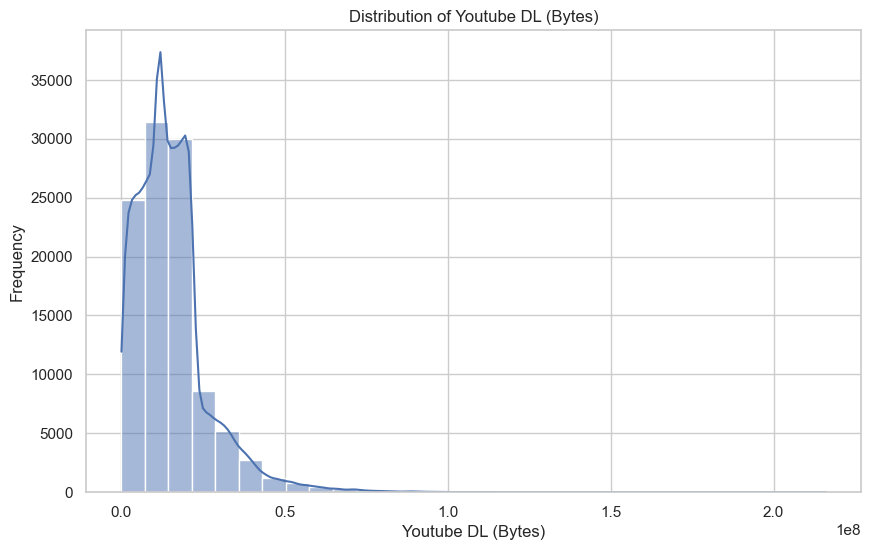

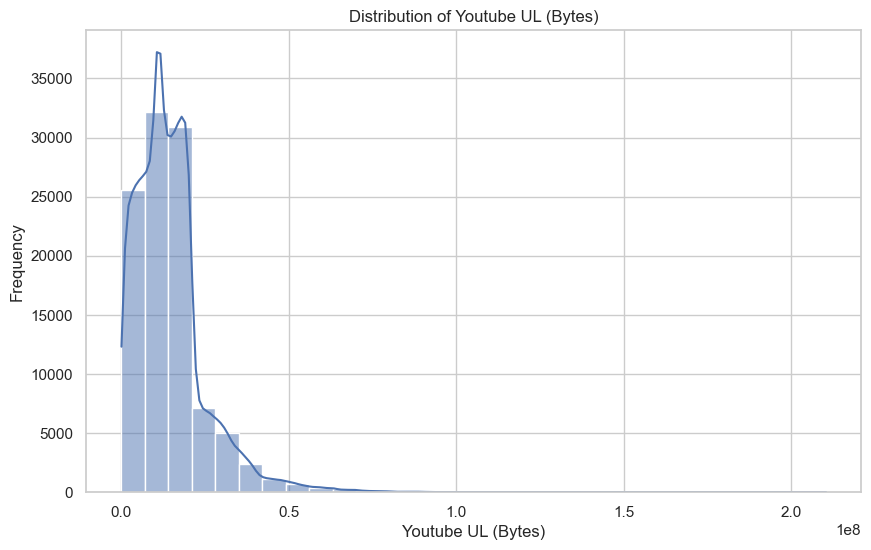

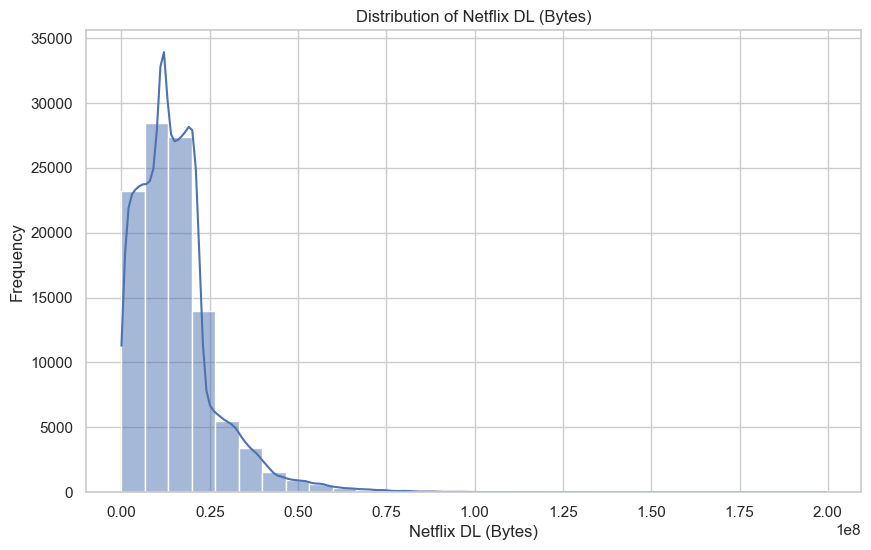

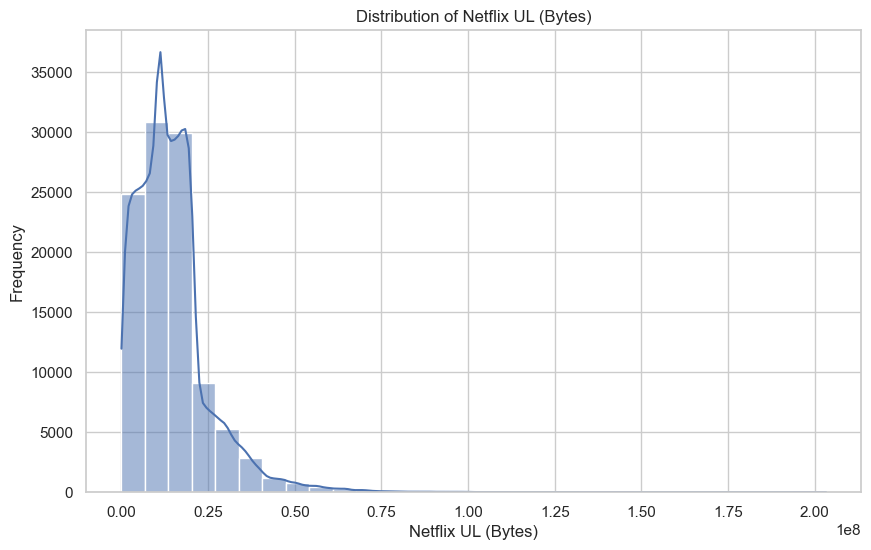

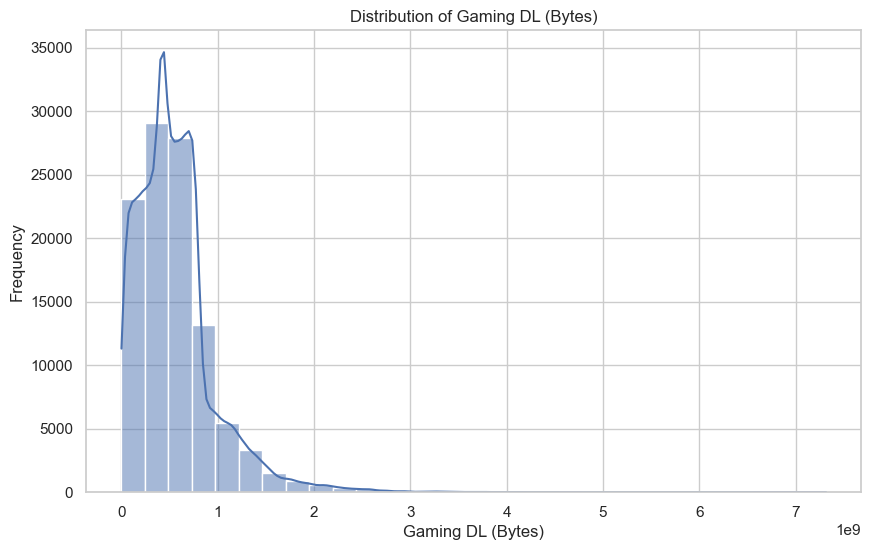

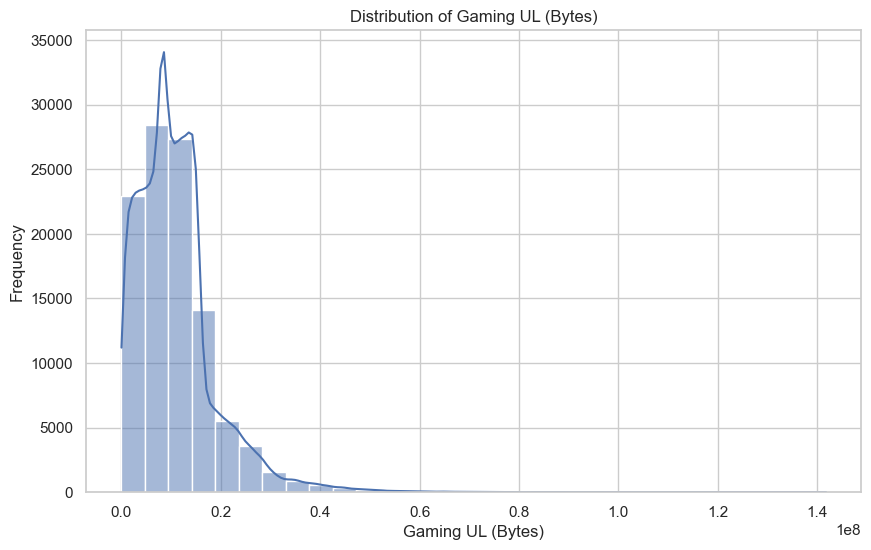

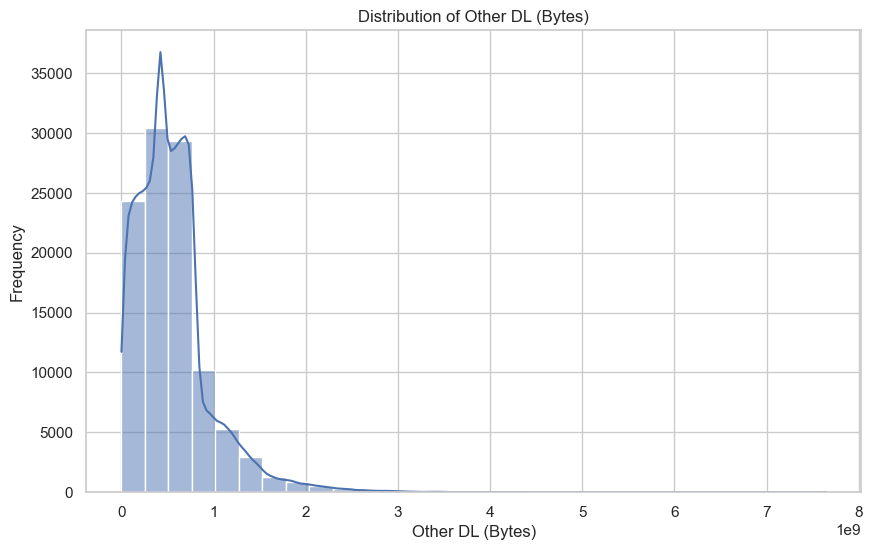

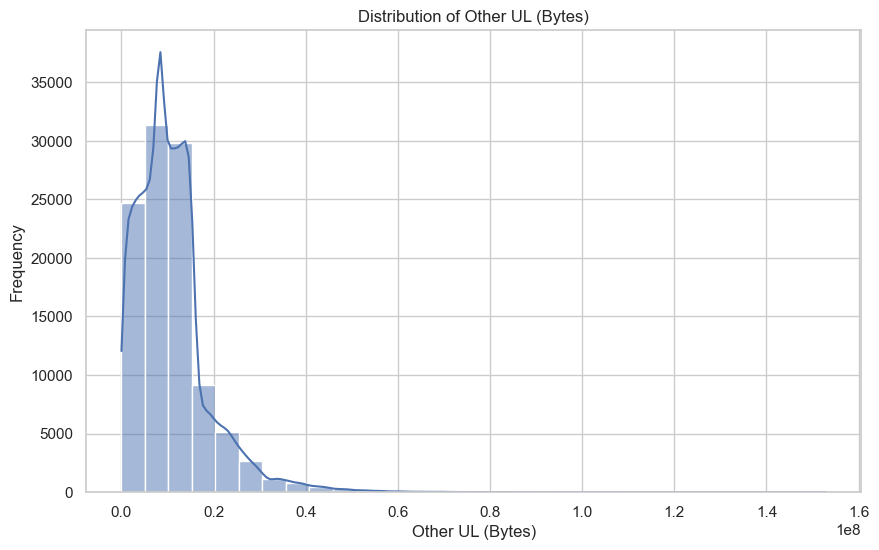

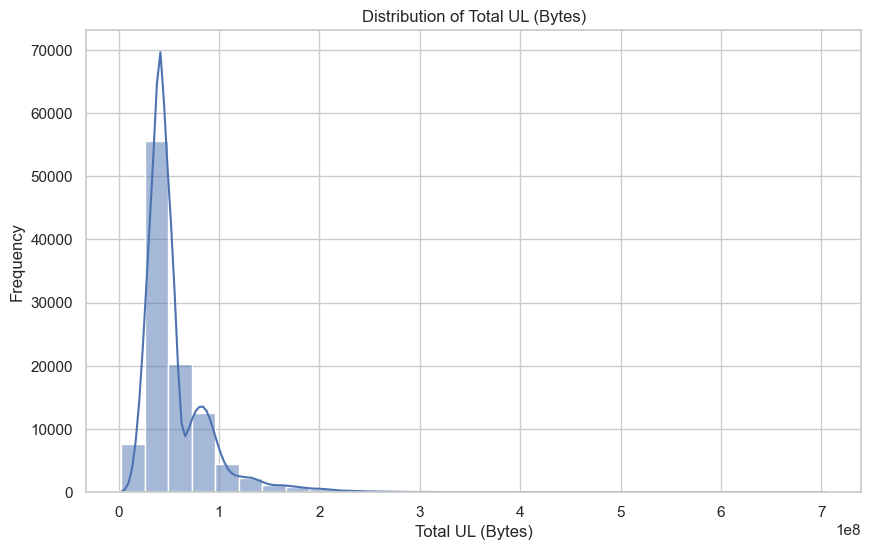

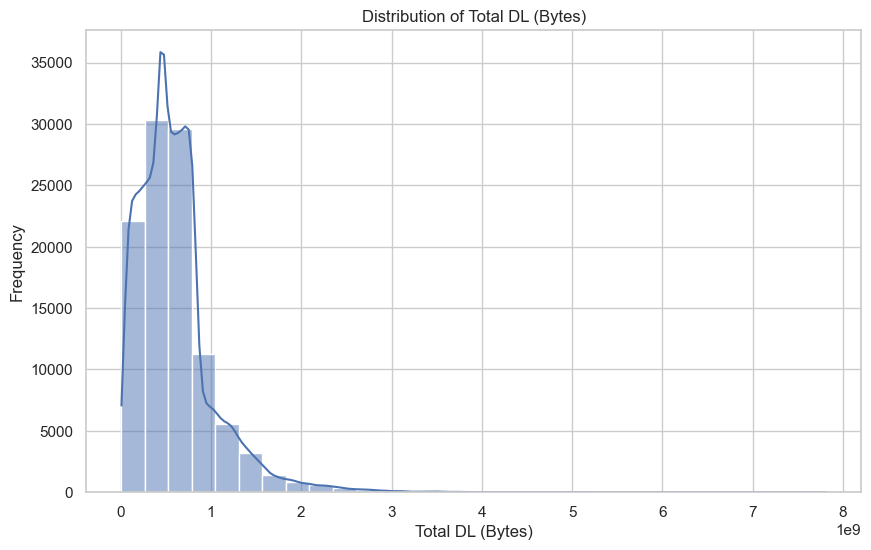

In [26]:
# graphical Graphical Univariate Analysis
plotting.univariate_analysis(grouped_data)

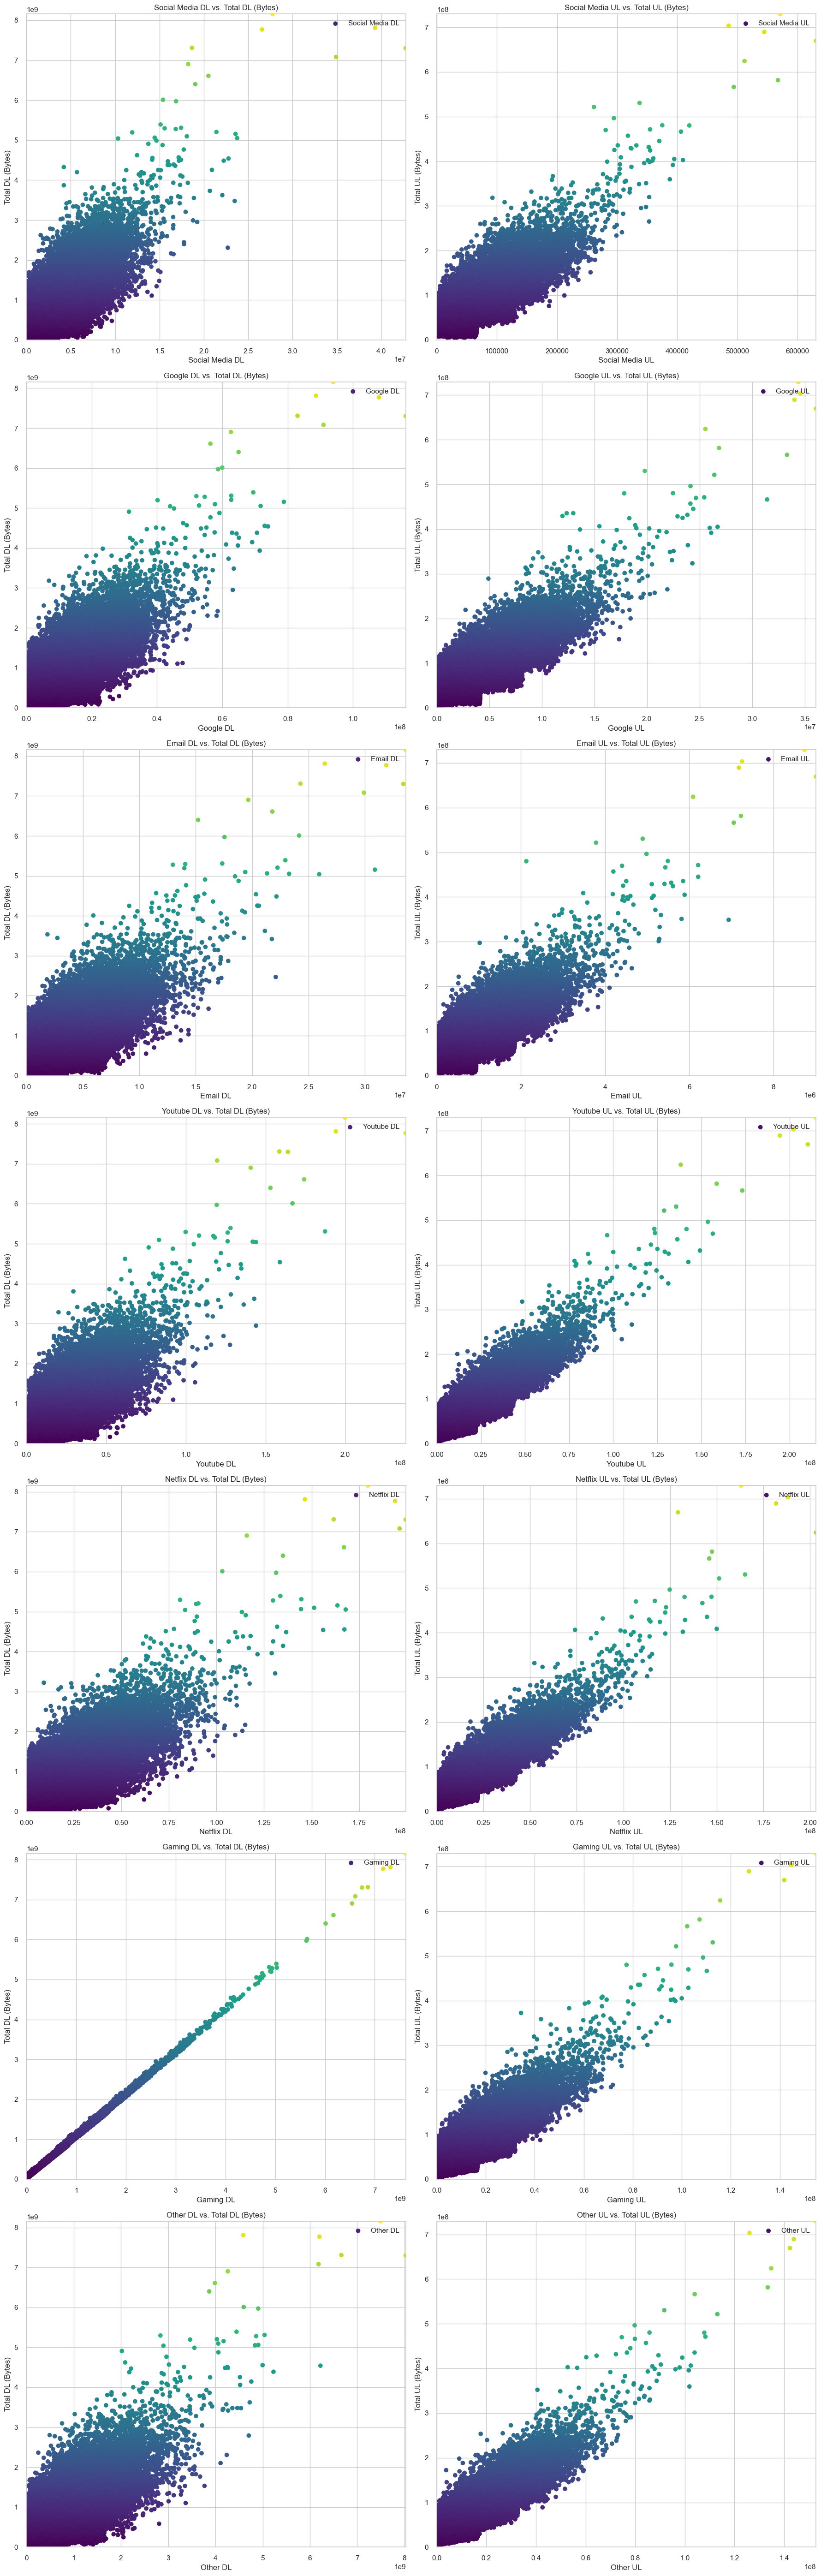

In [63]:

app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

total_dl_col = 'Total DL (Bytes)'
total_ul_col = 'Total UL (Bytes)'

plotting.bivariate_analysis(grouped_data, app_columns, total_dl_col, total_ul_col)

In [66]:
grouped_data.columns


Index(['MSISDN/Number', 'Number of xDR sessions', 'Session duration (ms)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [72]:
# Segment users into deciles based on total duration
grouped_data['Decile'] = pd.qcut(grouped_data['Session duration (ms)'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False)

# Compute total data (DL+UL) per decile class
decile_totals = grouped_data.groupby('Decile').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
# Print the resulting DataFrame
print(decile_totals.set_index('Decile'))

        Total UL (Bytes)  Total DL (Bytes)
Decile                                    
0           4.494350e+11      4.989842e+12
1           5.053079e+11      5.604102e+12
2           5.437496e+11      5.992652e+12
3           5.006783e+11      5.533562e+12
4           4.271904e+11      4.716541e+12
5           5.333274e+11      5.892924e+12
6           5.056942e+11      5.646784e+12
7           6.522641e+11      7.169970e+12
8           7.702495e+11      8.535245e+12
9           1.235959e+12      1.362797e+13


In [73]:
# Select the relevant columns for correlation analysis
correlation_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Subset the DataFrame with the selected columns
correlation_data = grouped_data[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Interpretation
print("\nInterpretation:")
print("The correlation matrix shows the correlation coefficients between different data usage categories.")
print("Values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values near 0 indicate little to no correlation.")

Correlation Matrix:
                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                 0.583055   
Social Media UL (Bytes)                 0.583055                 1.000000   
Google DL (Bytes)                       0.585202                 0.586869   
Google UL (Bytes)                       0.582765                 0.585862   
Email DL (Bytes)                        0.585432                 0.584371   
Email UL (Bytes)                        0.582011                 0.582182   
Youtube DL (Bytes)                      0.582656                 0.584491   
Youtube UL (Bytes)                      0.582831                 0.583756   
Netflix DL (Bytes)                      0.583691                 0.584745   
Netflix UL (Bytes)                      0.581994                 0.578755   
Gaming DL (Bytes)                       0.580919                 0.582474   
Gaming UL (Bytes)                       0.583649        

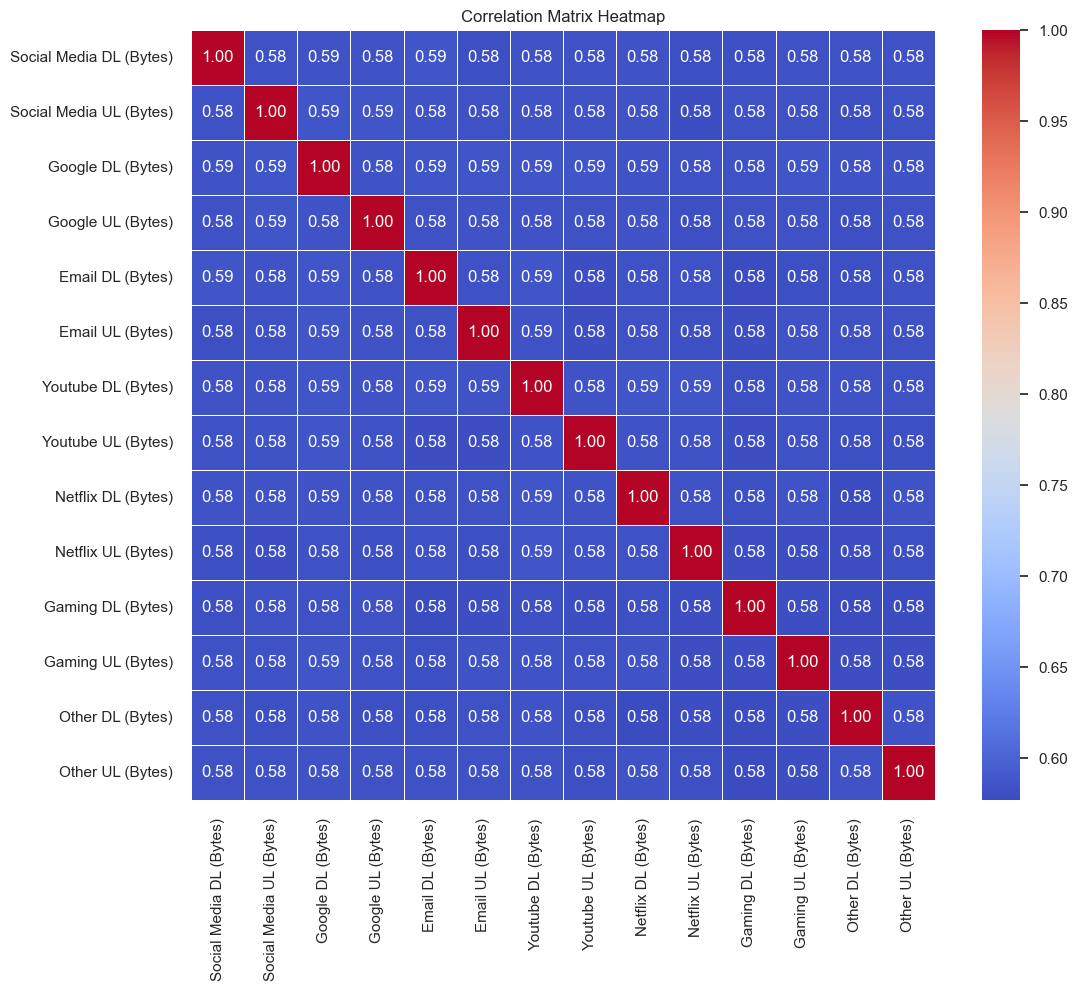

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [77]:
# Select the relevant columns for PCA
pca_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Subset the DataFrame with the selected columns
pca_data = grouped_data[pca_columns]

# Standardize the data
standardized_data = (pca_data - pca_data.mean()) / pca_data.std()

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(pca_columns))])

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Interpretation
print("\nInterpretation:")
print("1. The explained variance ratio indicates the proportion of variance captured by each principal component.")
print("2. Consider selecting a sufficient number of principal components to retain a significant amount of variance, e.g., 80% or 90%.")
print("3. Principal components with higher explained variance ratios contribute more to the overall variance in the data.")
print("4. The principal components can be used as new features that capture the most important information in the original data.")

Explained Variance Ratio:
[0.61263762 0.03054967 0.03027736 0.0301556  0.03005009 0.03001774
 0.02992908 0.0298587  0.02967515 0.02955266 0.02946581 0.02937676
 0.02927738 0.02917637]

Interpretation:
1. The explained variance ratio indicates the proportion of variance captured by each principal component.
2. Consider selecting a sufficient number of principal components to retain a significant amount of variance, e.g., 80% or 90%.
3. Principal components with higher explained variance ratios contribute more to the overall variance in the data.
4. The principal components can be used as new features that capture the most important information in the original data.


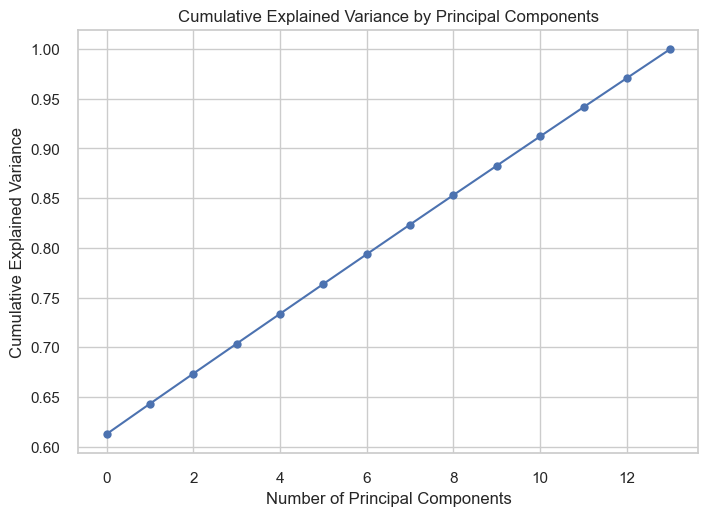

In [82]:
#visualize the cumulative explained variance


cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

In [83]:
ts3_df=df.copy()

In [84]:
cleaner.missing_values_table(ts3_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [88]:
clean_df=cleaner.drop_columns_by_missing_percentage(ts3_df,30)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.

Dropped 10 columns based on the 30% missing value threshold.
Remaining columns: 45


In [90]:
clean_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
